In [34]:
import pandas as pd
import numpy as np

dataset=pd.read_csv(r"Employee.csv")
print(dataset)
dataset.info()

      Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors         2017  Bangalore            3   34    Male          No   
1     Bachelors         2013       Pune            1   28  Female          No   
2     Bachelors         2014  New Delhi            3   38  Female          No   
3       Masters         2016  Bangalore            3   27    Male          No   
4       Masters         2017       Pune            3   24    Male         Yes   
...         ...          ...        ...          ...  ...     ...         ...   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4649    Masters         2013       Pune            2   37    Male          No   
4650    Masters         2018  New Delhi            3   27    Male          No   
4651  Bachelors         2012  Bangalore            3   30    Male         Yes   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes   

      ExperienceInCurrentDo

In [35]:
print(max(dataset.Age))
print(min(dataset.Age))
#bin1=[21,26,31,36,41]
#group1=['21-26','26-31','31-36','36-41']
#dataset['Age']=pd.cut(dataset['Age'],bins=bin1,labels=group1)
#print(dataset)

41
22


In [36]:
dataset=dataset.drop("Education", axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   JoiningYear                4653 non-null   int64 
 1   City                       4653 non-null   object
 2   PaymentTier                4653 non-null   int64 
 3   Age                        4653 non-null   int64 
 4   Gender                     4653 non-null   object
 5   EverBenched                4653 non-null   object
 6   ExperienceInCurrentDomain  4653 non-null   int64 
 7   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 290.9+ KB


In [37]:
XSample=dataset.iloc[:,0:8]
ySample=dataset.LeaveOrNot
print(dataset.Age.unique())

[34 28 38 27 24 22 23 37 32 39 29 30 36 31 25 26 40 35 33 41]


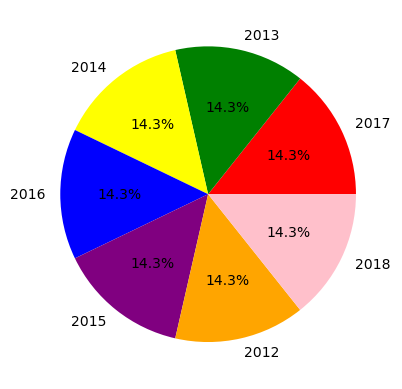

In [39]:
plt.pie(dataset.JoiningYear.unique(),labels=["2017", "2013", "2014", "2016", "2015", "2012", "2018"], colors=["Red","Green","Yellow","Blue","Purple","Orange","Pink"], autopct="%1.1f%%")
plt.show()

In [ ]:
plt.pie(dataset.JoiningYear.unique(),labels=["2017", "2013", "2014", "2016", "2015", "2012", "2018"], colors=["Red","Green","Yellow","Blue","Purple","Orange","Pink"], autopct="%1.1f%%")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#XSample.Education=le.fit_transform(XSample.Education)
XSample.JoiningYear=le.fit_transform(XSample.JoiningYear)
XSample.City=le.fit_transform(XSample.City)
XSample.Age=le.fit_transform(XSample.Age)
XSample.Gender=le.fit_transform(XSample.Gender)
XSample.EverBenched=le.fit_transform(XSample.EverBenched)
print(XSample)

      JoiningYear  City  PaymentTier  Age  Gender  EverBenched  \
0               5     0            3    2       1            0   
1               1     2            1    1       0            0   
2               2     1            3    3       0            0   
3               4     0            3    1       1            0   
4               5     2            3    0       1            1   
...           ...   ...          ...  ...     ...          ...   
4648            1     0            3    0       0            0   
4649            1     2            2    3       1            0   
4650            6     1            3    1       1            0   
4651            0     0            3    1       1            1   
4652            3     0            3    2       1            1   

      ExperienceInCurrentDomain  LeaveOrNot  
0                             0           0  
1                             3           1  
2                             2           0  
3                      

In [ ]:
from sklearn.model_selection import train_test_split
XTrain,XTest,yTrain,yTest=train_test_split(XSample,ySample,test_size=0.20,random_state=10) #yüzde20luk kısmını test için ayırdık

print(XSample.shape)
print(XTrain.shape)
print(XTest.shape)

(4653, 8)
(3722, 8)
(931, 8)


              precision    recall  f1-score   support

           0       0.96      0.99      0.97       600
           1       0.99      0.92      0.95       331

    accuracy                           0.97       931
   macro avg       0.97      0.96      0.96       931
weighted avg       0.97      0.97      0.97       931



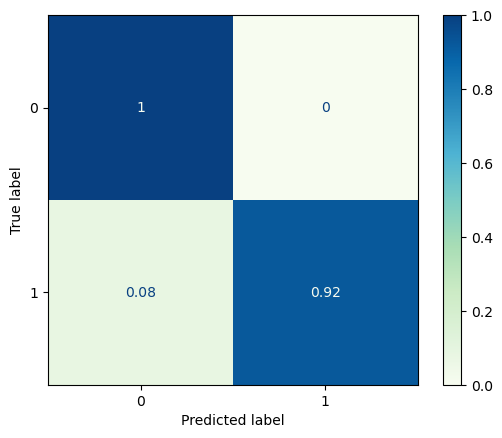

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
  #Train Kısmı
classifier=KNeighborsClassifier(n_neighbors=9, metric="minkowski", p=1)
classifier.fit(XTrain,yTrain) 
  #Test Kısmı
yTestPred=classifier.predict(XTest)
print(metrics.classification_report(yTest, yTestPred)) 

cm=metrics.confusion_matrix(yTest,yTestPred,normalize="true").round(2)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp=disp.plot(cmap=plt.cm.GnBu, values_format="g") 
plt.show()